## Utilize OSMnx to retrieve street network and point-of-interest data from OpenStreetMap

This code extracts building and road data from OpenStreetMap using the osmnx library and plots the buildings and roads on a map using matplotlib.

First, the necessary libraries are imported: osmnx for accessing OpenStreetMap data and converting it to networkx graphs, geopandas for handling geographic data, pandas for data manipulation, networkx for network analysis, and matplotlib for plotting.

Next, the tags to filter the OpenStreetMap data are defined. In this case, the code is extracting buildings, so the tag is set to {'building':True}.

The center point and distance for extracting the data are then defined. The center point is set to the coordinates (57.1497, -2.0943) and the distance is set to 100 meters.

The code then extracts buildings data from OpenStreetMap using the features_from_point function from osmnx and converts the data to a GeoDataFrame using geopandas. The first few rows of the GeoDataFrame are displayed using the head() function.

The code then extracts roads data from OpenStreetMap using the graph_from_point function from osmnx and converts the data to a GeoDataFrame using osmnx. The first few rows of the GeoDataFrame are displayed using the head() function.

The code plots the buildings and roads data on a map using matplotlib. The buildings are plotted in the original color and the roads are plotted in red. The plot is displayed using the show() function.  

Finally, the two datasets are saved as geojson files


In [24]:
# Import necessary libraries
# osmnx is used for accessing OpenStreetMap data and converting it to networkx graphs
# geopandas is used for handling geographic data
# pandas is used for data manipulation
# networkx is used for network analysis
# matplotlib is used for plotting

import osmnx as ox
import geopandas as gpd
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [25]:
# Define the tags to filter the OpenStreetMap data
tags = tags={'building':True}

In [57]:

# Define the center point and distance for extracting the data
center_point = (57.179249,-2.132190)
# and the extent of the area
dist = 100

In [58]:
# Extract buildings data from OpenStreetMap
buildings = ox.features_from_point(center_point, tags, dist)

# Convert the buildings data to a GeoDataFrame
buildings_gdf = gpd.GeoDataFrame(buildings, geometry='geometry')

In [59]:
# Display the first few rows of the GeoDataFrame
buildings_gdf.head()

geometry  \
element id                                                             
way     965071710  POLYGON ((-2.13269 57.18022, -2.13262 57.18013...   
        965071711  POLYGON ((-2.13286 57.18018, -2.13276 57.1802,...   
        965071712  POLYGON ((-2.13296 57.18015, -2.13289 57.18007...   
        965071713  POLYGON ((-2.1336 57.18001, -2.13351 57.1799, ...   
        965071714  POLYGON ((-2.13341 57.18007, -2.13332 57.17996...   

                  addr:city addr:postcode     addr:street            building  \
element id                                                                      
way     965071710  Aberdeen      AB22 8ZZ  Fairview Drive  semidetached_house   
        965071711  Aberdeen      AB22 8ZZ  Fairview Drive  semidetached_house   
        965071712  Aberdeen      AB22 8ZZ  Fairview Drive  semidetached_house   
        965071713  Aberdeen      AB22 8ZZ  Fairview Drive            detached   
        965071714  Aberdeen      AB22 8ZZ  Fairview Drive            detached   

                  building:levels roof:shape roof:levels addr:housenumber  
element id                                                                 
way     965071710               1     gabled         NaN              NaN  
        965071711               1     gabled         NaN              NaN  
        965071712               1     gabled         NaN              NaN  
        965071713               1     gabled         NaN              NaN  
        965071714               1     gabled         NaN              NaN

In [60]:
# Extract roads data from OpenStreetMap
roads = ox.graph_from_point(center_point=center_point,dist=dist, network_type='all')

In [61]:
# Convert the roads data to a GeoDataFrame
roads_gdf = ox.graph_to_gdfs(roads, nodes=False)

In [62]:
# Display the first few rows of the GeoDataFrame
roads_gdf.head()

osmid       highway lanes maxspeed  \
u        v          key                                           
51958244 4866275583 0    905131796   residential     2   30 mph   
         51959271   0      6227344   residential   NaN   30 mph   
51959271 51958244   0      6227344   residential   NaN   30 mph   
51961073 51961416   0      6227440   residential   NaN   30 mph   
         51963112   0      6227509  unclassified   NaN   30 mph   

                                  name  oneway reversed     length  \
u        v          key                                              
51958244 4866275583 0     Laurel Drive   False    False  22.984928   
         51959271   0    Fairview Brae   False    False  70.083551   
51959271 51958244   0    Fairview Brae   False     True  70.083551   
51961073 51961416   0     Laurel Place   False     True  69.179756   
         51963112   0              NaN   False    False  30.428381   

                                                                  geometry  
u        v          key                                                     
51958244 4866275583 0    LINESTRING (-2.13348 57.17942, -2.13382 57.17933)  
         51959271   0    LINESTRING (-2.13348 57.17942, -2.1335 57.1794...  
51959271 51958244   0    LINESTRING (-2.13378 57.18003, -2.13375 57.179...  
51961073 51961416   0    LINESTRING (-2.13259 57.17869, -2.13236 57.178...  
         51963112   0    LINESTRING (-2.13259 57.17869, -2.13257 57.178...

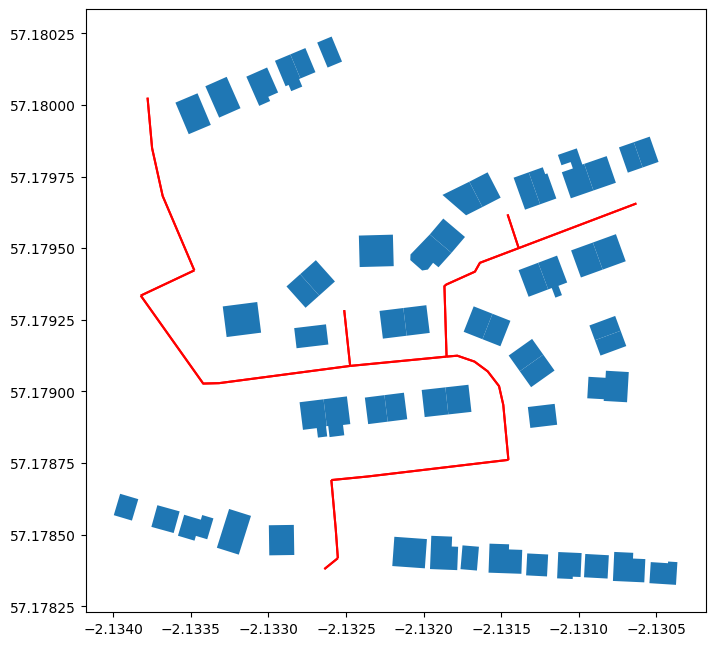

In [63]:
# Plot the buildings and roads data
fig, ax = plt.subplots(figsize=(8, 8))
buildings_gdf.plot(ax=ax)
roads_gdf.plot(ax=ax,color='red')
plt.show()


In [64]:
# Save the GeoDataFrame as GeoJSON
buildings_gdf.to_file("buildings.geojson", driver="GeoJSON")
roads_gdf.to_file("roads.geojson", driver="GeoJSON")